In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/CLEAN_FIFA23_official_data.csv")
df.shape

(17660, 31)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17660 non-null  int64  
 1   ID                        17660 non-null  int64  
 2   Name                      17660 non-null  object 
 3   Age                       17660 non-null  int64  
 4   Photo                     17660 non-null  object 
 5   Nationality               17660 non-null  object 
 6   Flag                      17660 non-null  object 
 7   Overall                   17660 non-null  int64  
 8   Potential                 17660 non-null  int64  
 9   Club                      17660 non-null  object 
 10  Club Logo                 17660 non-null  object 
 11  Value(£)                  17660 non-null  float64
 12  Wage(£)                   17660 non-null  float64
 13  Special                   17660 non-null  int64  
 14  Prefer

In [54]:
df.isna().sum().sort_values(ascending=False)

,0
Loaned From,16966
Body Type,38
Unnamed: 0,0
Age,0
Photo,0
ID,0
Name,0
Overall,0
Potential,0
Club,0


In [74]:
df["Position"].unique()

array(['SUB', 'LCM', 'LB', 'RCM', 'RDM', 'LCB', 'RS', 'RB', 'LM', 'LS',
       'RWB', 'CDM', 'RW', 'RM', 'LF', 'LWB', 'ST', 'CAM', 'LDM', 'RES',
       'LW', 'CF', 'RF', 'RCB', 'CM', 'CB', 'RAM', 'LAM', 'GK'],
      dtype=object)

In [75]:
df["Position"].value_counts()

,count
Position,
SUB,7462
RES,5224
RCB,449
LCB,398
GK,376
ST,346
LB,330
RB,327
RCM,325


In [76]:
attacker_positions = ["ST", "CF", "LW", "RW", "LF", "RF"]

df["Position"] = df["Position"].astype(str)

attackers = df[df["Position"].apply(
    lambda x: any(tag in x.split(",") for tag in attacker_positions)
)].copy()

attackers.shape

(699, 31)

In [56]:
attackers = attackers[
    ["Name", "Age", "Nationality", "Club", "Position",
     "Overall", "Potential",
     "Value(£)", "Wage(£)"]
].copy()

attackers.head()

,Name,Age,Nationality,Club,Position,Overall,Potential,Value(£),Wage(£)
25,M. Salah,30,Egypt,Liverpool,RW,90,90,115500000.0,270000.0
35,R. Malinovskyi,29,Ukraine,Atalanta,LF,82,82,30500000.0,73000.0
41,R. Lewandowski,33,Poland,FC Barcelona,ST,91,91,84000000.0,420000.0
48,B. Bourigeaud,28,France,Stade Rennais FC,RW,81,81,26000000.0,66000.0
52,H. Kane,28,England,Tottenham Hotspur,ST,89,89,105500000.0,240000.0


In [57]:
def clean_currency(col):
    return (
        col.astype(str)
           .str.replace("£", "", regex=False)
           .str.replace("£", "", regex=False)
           .str.replace(",", "", regex=False)
           .astype(float)
    )

attackers["value_gbp"] = clean_currency(attackers["Value(£)"])
attackers["wage_gbp"] = clean_currency(attackers["Wage(£)"])

In [58]:
attackers[["Value(£)", "value_gbp", "Wage(£)", "wage_gbp"]].head()

,Value(£),value_gbp,Wage(£),wage_gbp
25,115500000.0,115500000.0,270000.0,270000.0
35,30500000.0,30500000.0,73000.0,73000.0
41,84000000.0,84000000.0,420000.0,420000.0
48,26000000.0,26000000.0,66000.0,66000.0
52,105500000.0,105500000.0,240000.0,240000.0


In [59]:
attackers.isna().sum()

,0
Name,0
Age,0
Nationality,0
Club,0
Position,0
Overall,0
Potential,0
Value(£),0
Wage(£),0
value_gbp,0


In [60]:
attackers = attackers.dropna(subset=["Overall", "value_gbp"])
attackers = attackers[attackers["value_gbp"] > 0]

attackers.shape

(689, 11)

In [62]:
print("Original df:", df.shape)
print("Attackers df:", attackers.shape)
attackers.head()

Original df: (17660, 31)
Attackers df: (689, 11)


,Name,Age,Nationality,Club,Position,Overall,Potential,Value(£),Wage(£),value_gbp,wage_gbp
25,M. Salah,30,Egypt,Liverpool,RW,90,90,115500000.0,270000.0,115500000.0,270000.0
35,R. Malinovskyi,29,Ukraine,Atalanta,LF,82,82,30500000.0,73000.0,30500000.0,73000.0
41,R. Lewandowski,33,Poland,FC Barcelona,ST,91,91,84000000.0,420000.0,84000000.0,420000.0
48,B. Bourigeaud,28,France,Stade Rennais FC,RW,81,81,26000000.0,66000.0,26000000.0,66000.0
52,H. Kane,28,England,Tottenham Hotspur,ST,89,89,105500000.0,240000.0,105500000.0,240000.0


In [63]:
attackers[["Overall", "Potential", "value_gbp", "wage_gbp"]].describe()

,Overall,Potential,value_gbp,wage_gbp
count,689.000000,689.000000,6.890000e+02,689.000000
mean,70.397678,74.275762,8.859536e+06,21986.502177
std,7.409437,6.925224,1.836342e+07,43854.810741
min,51.000000,56.000000,6.000000e+04,500.000000
25%,65.000000,70.000000,1.000000e+06,2000.000000
50%,70.000000,74.000000,2.100000e+06,6000.000000
75%,76.000000,79.000000,7.000000e+06,23000.000000
max,91.000000,95.000000,1.905000e+08,450000.000000


In [64]:
attackers["performance_score"] = 0.7*attackers["Overall"] + 0.3*attackers["Potential"]

In [65]:
attackers["value_score"] = attackers["performance_score"] / (attackers["value_gbp"] / 1_000_000)

In [66]:
attackers[["Name","Position","Overall","Potential","value_gbp","performance_score","value_score"]].head()

,Name,Position,Overall,Potential,value_gbp,performance_score,value_score
25,M. Salah,RW,90,90,115500000.0,90.0,0.779221
35,R. Malinovskyi,LF,82,82,30500000.0,82.0,2.688525
41,R. Lewandowski,ST,91,91,84000000.0,91.0,1.083333
48,B. Bourigeaud,RW,81,81,26000000.0,81.0,3.115385
52,H. Kane,ST,89,89,105500000.0,89.0,0.843602


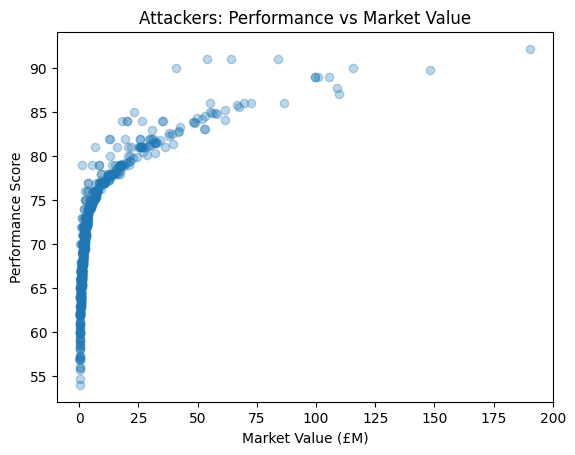

In [67]:
plt.figure()
plt.scatter(attackers["value_gbp"]/1_000_000, attackers["performance_score"], alpha=0.3)
plt.xlabel("Market Value (£M)")
plt.ylabel("Performance Score")
plt.title("Attackers: Performance vs Market Value")
plt.show()

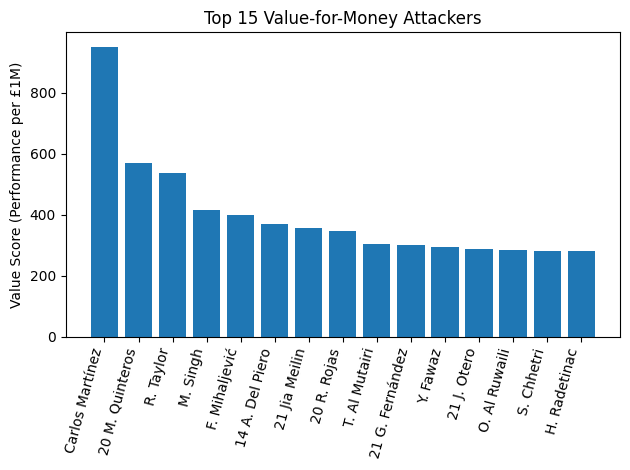

In [68]:
top15 = attackers.sort_values("value_score", ascending=False).head(15)

plt.figure()
plt.bar(top15["Name"], top15["value_score"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("Value Score (Performance per £1M)")
plt.title("Top 15 Value-for-Money Attackers")
plt.tight_layout()
plt.show()

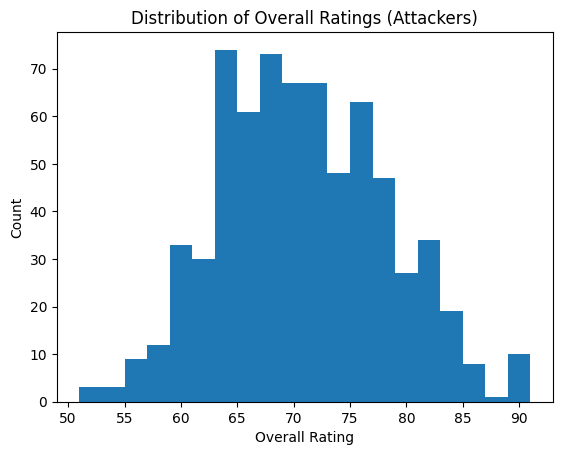

In [69]:
plt.figure()
plt.hist(attackers["Overall"], bins=20)
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.title("Distribution of Overall Ratings (Attackers)")
plt.show()

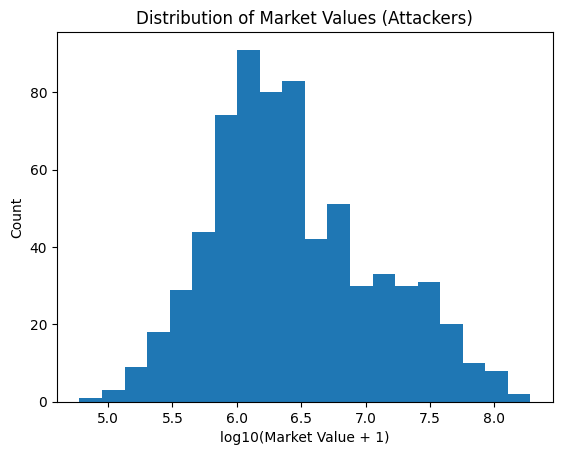

In [70]:
plt.figure()
plt.hist(np.log10(attackers["value_gbp"] + 1), bins=20)
plt.xlabel("log10(Market Value + 1)")
plt.ylabel("Count")
plt.title("Distribution of Market Values (Attackers)")
plt.show()

In [71]:
shortlist = attackers.sort_values(["value_score", "performance_score"], ascending=False).head(50)

shortlist_out = shortlist[
    ["Name", "Age", "Nationality", "Club", "Position",
     "Overall", "Potential",
     "value_gbp", "wage_gbp",
     "performance_score", "value_score"]
]

shortlist_out.to_csv("attackers_shortlist_top50.csv", index=False)
shortlist_out.head(10)

,Name,Age,Nationality,Club,Position,Overall,Potential,value_gbp,wage_gbp,performance_score,value_score
14599,Carlos Martínez,36,Spain,FC Andorra,ST,57,57,60000.0,1000.0,57.0,950.000000
14256,20 M. Quinteros,30,Argentina,CD Universidad de Concepción,ST,57,57,100000.0,900.0,57.0,570.000000
8964,R. Taylor,34,England,Grimsby Town,ST,59,59,110000.0,2000.0,59.0,536.363636
14810,M. Singh,21,India,NorthEast United FC,ST,51,61,130000.0,500.0,54.0,415.384615
13676,F. Mihaljević,30,Croatia,Finn Harps,ST,56,56,140000.0,500.0,56.0,400.000000
5378,14 A. Del Piero,38,Italy,Sydney FC,ST,70,70,190000.0,30000.0,70.0,368.421053
9632,21 Jia Meilin,30,China PR,Jiangsu FC,RW,57,57,160000.0,4000.0,57.0,356.250000
13448,20 R. Rojas,26,Venezuela,Atlético Bucaramanga,ST,59,59,170000.0,500.0,59.0,347.058824
14846,T. Al Mutairi,21,Saudi Arabia,Al Batin,ST,52,61,180000.0,5000.0,54.7,303.888889
11078,21 G. Fernández,32,Venezuela,Aragua Fútbol Club,ST,60,60,200000.0,500.0,60.0,300.000000
